<a href="https://colab.research.google.com/github/prajwalp111/ML/blob/main/seoul_bike_ml/seoulBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import tensorflow as tf
from sklearn.linear_model import LinearRegression

Dataset : https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

# Data Loading

In [2]:
dataset_cols  = ['bike_count','hour','temp','humidity','wind','visibility','dew_pt_temp','radiation','rain','snow','functional']
df = pd.read_csv('https://raw.githubusercontent.com/prajwalp111/ML/main/seoul_bike_ml/SeoulBikeData.csv', encoding='ISO-8859-1').drop(['Date','Seasons','Holiday'], axis=1)

In [3]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

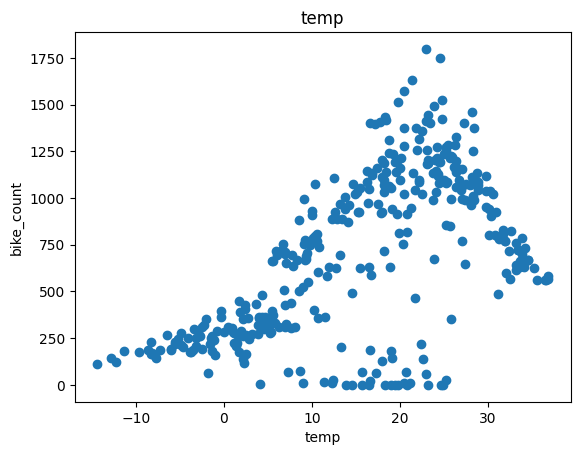

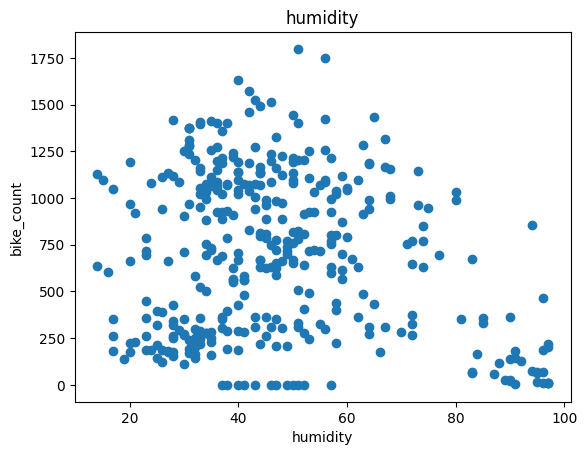

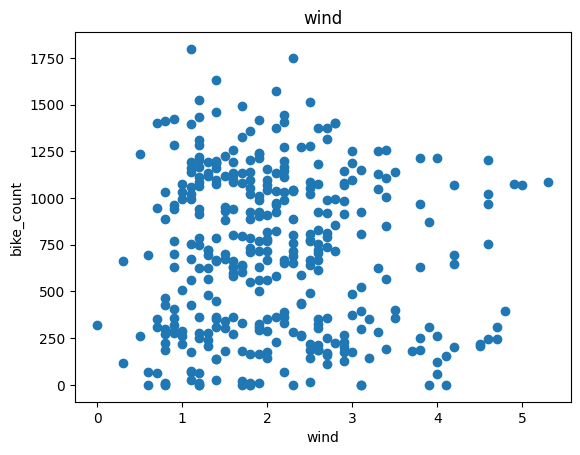

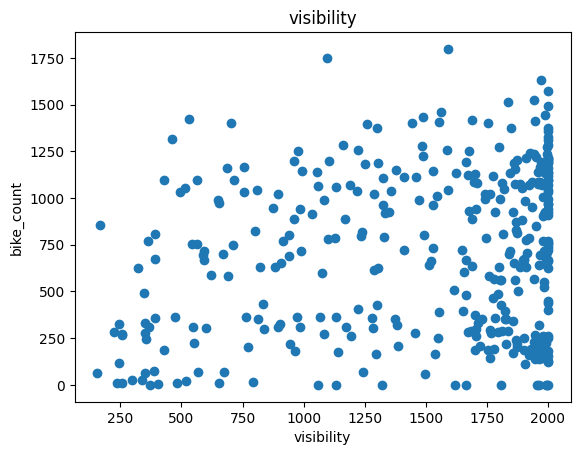

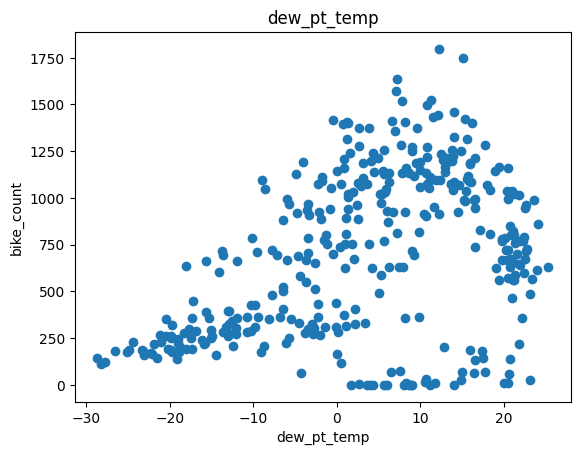

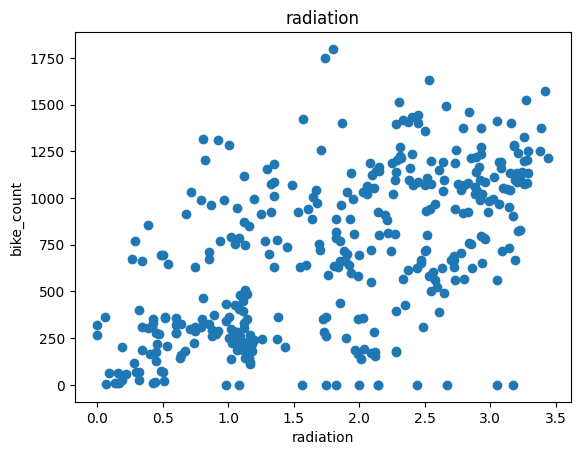

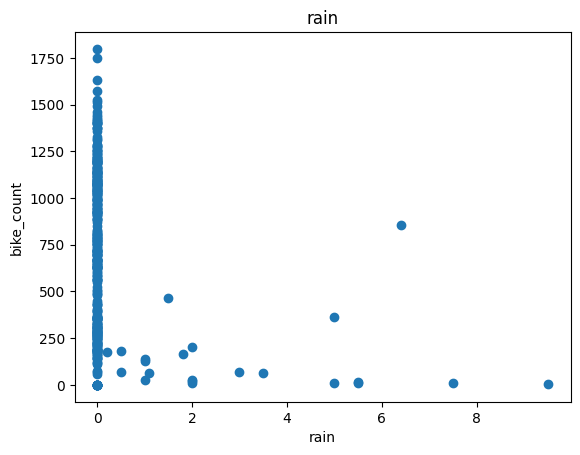

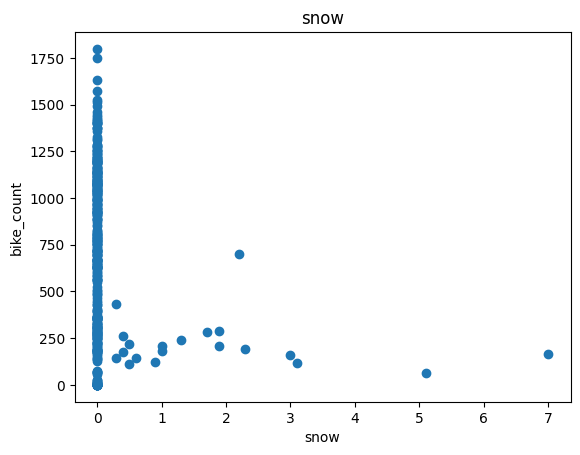

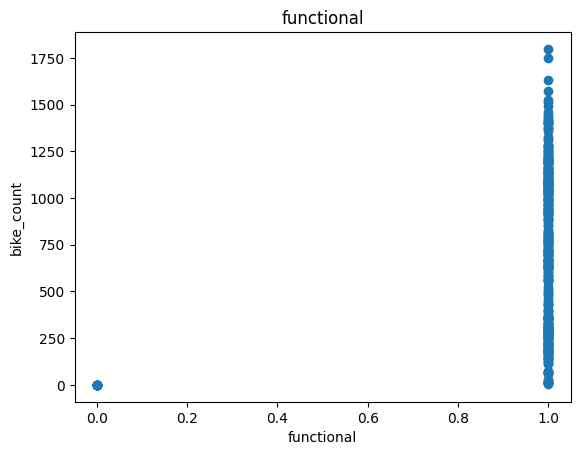

In [5]:
for label in df.columns[1:]:
  plt.scatter(df[label],df['bike_count'])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('bike_count')
  plt.show()

based on graph

In [6]:
df = df.drop(['wind','visibility','functional'], axis = 1)

In [7]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train , test n valid

### Simple Linear Regession

In [8]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def get_xy(dataFrame, y_labels, X_labels=None):
  dataFrame = copy.deepcopy(dataFrame)
  if not X_labels:
    X = dataFrame[[c for c in dataFrame.columns if c not in y_labels]].values
  else:
    if len(X_labels) == 1:
      X = dataFrame[X_labels[0]].values.reshape(-1,1)
    else:
      X = dataFrame[X_labels].values

  y = dataFrame[y_labels].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X, y

**Flexibility:**

1.Sometimes when you train a model, you may want to control exactly which columns are input features (X) and which column(s) are target/output (y).

2.If X_labels is given → use only those columns as input.

3.If X_labels is not given → automatically use all columns except y_labels.

**Handling 1 feature vs multiple features:**

1.If you pick only 1 feature (say "age" column alone), .values would return a 1D array like:
[25, 30, 22]
but machine learning libraries (like sklearn) expect a 2D array:
[[25], [30], [22]]

2.So you reshape it into (n_samples, 1) shape using .reshape(-1, 1).

3.If multiple features are selected (say "age" and "salary"), .values already gives you a 2D array, so no reshaping needed.



In [10]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', X_labels = ['temp'])
_, X_val_temp, y_val_temp = get_xy(valid, 'bike_count', X_labels = ['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', X_labels = ['temp'])

In [11]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [15]:
print('coeff',temp_reg.coef_)
print('intercept',temp_reg.intercept_)
print('r^2',temp_reg.score(X_train_temp, y_train_temp))

coeff [[22.93153771]]
intercept [349.2443494]
r^2 0.35108967727778206


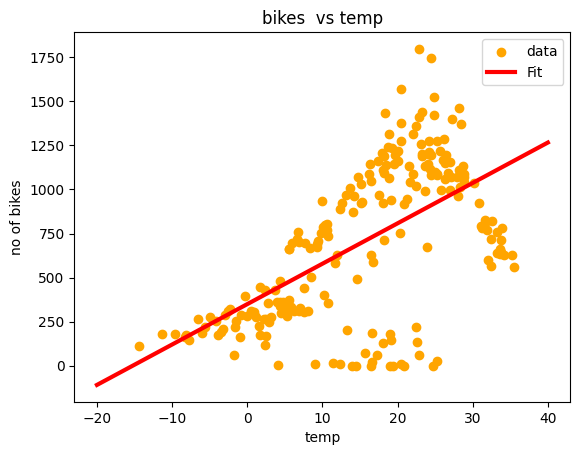

In [26]:
plt.scatter(X_train_temp, y_train_temp, label='data', color ='orange')
# x = tf.linspace(-20, 40, 100)
# plt.plot(x,temp_reg.predict(np.array(x).reshape(-1.1)), label='Fit', color='red', linewidth=3)

x = np.linspace(-20, 40, 100)  # Corrected: np.linspace
plt.plot(x, temp_reg.predict(x.reshape(-1, 1)), label='Fit', color='red', linewidth=3)  # Corrected: reshape(-1, 1)


plt.legend()
plt.title("bikes  vs temp")
plt.ylabel('no of bikes')
plt.xlabel('temp')
plt.show()

### Multiple Linear Regession

In [27]:
def get_2dxy(dataFrame, y_labels, X_labels=None):
  dataFrame = copy.deepcopy(dataFrame)
  if X_labels is None:
    X = dataFrame[[c for c in dataFrame.columns if c not in y_labels]].values
  else:
    if len(X_labels) == 1:
      X = dataFrame[X_labels[0]].values.reshape(-1,1)
    else:
      X = dataFrame[X_labels].values

  y = dataFrame[y_labels].values.reshape(-1,1)
  data = np.hstack((X,y))

  return data, X, y

In [31]:
_, X_train_all, y_train_all = get_2dxy(train, 'bike_count', X_labels = df.columns[1:])
_, X_val_all, y_val_all = get_2dxy(valid, 'bike_count', X_labels = df.columns[1:])
_, X_test_all, y_test_all = get_2dxy(test, 'bike_count', X_labels =df.columns[1:])